First, load the data, from the supplied data file of the i-tree program

In [2]:
import pandas as pd
data = pd.read_csv("Copy of 21-06-27_LG-dati-alberi.csv")

# Describe Part:

About the data that we have:

1.The data is a table of 509 sampled trees, which includes 25 plots, 25 species of trees, and DBH, DBH height, and Total Height.

2.I mainly chose Plot, Species, to explore the relationship, and also observed the relationship between Plot and DBH and Total Height.

In [3]:
# what is the general type of the data
# tabular

In [4]:
# Simply count the number of rows using shape.
data.shape[0] 

509

In [5]:
# # Simply count the number of columns using shape.
data.shape[1] 

26

In [23]:
# Determine whether the data has abnormal data and whether it needs to be cleaned
for i in data.index: 
    assert data.loc[i,'Plot'] > 0 # plot should more than 0
    assert data.loc[i,'DBH 1 (cm)'] > 0 # DBH should more than 0
    assert data.loc[i,'Total Height (m)'] > 0 # Total Height (m) should more than 0

In [19]:
# There are max, min, std, mean, etc. of the data in file.
data.describe()

,Plot,ID,DBH 1 (cm),DBH 1: Height (m),DBH 2 (cm),DBH 2: Height (m),DBH 3 (cm),DBH 3: Height (m),DBH 4 (cm),DBH 4: Height (m),DBH 5 (cm),DBH 5: Height (m),DBH 6 (cm),DBH 6: Height (m),Total Height (m)
count,509.000000,509.000000,509.000000,0.0,95.000000,0.0,47.000000,0.0,19.000000,0.0,10.000000,0.0,8.000000,0.0,509.000000
mean,13.675835,14.275049,19.190963,NaN,14.464211,NaN,11.321277,NaN,11.510526,NaN,10.330000,NaN,19.950000,NaN,9.900000
std,7.130603,10.121846,18.309127,NaN,19.587208,NaN,7.601400,NaN,12.967519,NaN,9.771847,NaN,28.616728,NaN,4.706571
min,1.000000,1.000000,2.900000,NaN,0.600000,NaN,1.300000,NaN,1.600000,NaN,2.500000,NaN,0.900000,NaN,2.500000
25%,7.000000,6.000000,8.300000,NaN,5.550000,NaN,5.850000,NaN,3.200000,NaN,4.575000,NaN,4.400000,NaN,6.500000
50%,14.000000,12.000000,12.700000,NaN,9.600000,NaN,9.000000,NaN,7.600000,NaN,5.600000,NaN,7.500000,NaN,9.000000
75%,19.000000,21.000000,22.300000,NaN,15.450000,NaN,16.900000,NaN,12.250000,NaN,11.525000,NaN,18.200000,NaN,12.000000
max,25.000000,42.000000,195.000000,NaN,147.000000,NaN,35.300000,NaN,49.000000,NaN,29.000000,NaN,82.100000,NaN,23.000000


In [36]:
# It can be seen that what data is available, with text and values.
data.count()

Plot                 509
ID                   509
Survey Date          509
Species              509
Land Use             509
DBH 1 (cm)           509
DBH 1: Height (m)      0
DBH 1: Measured?     509
DBH 2 (cm)            95
DBH 2: Height (m)      0
DBH 2: Measured?     509
DBH 3 (cm)            47
DBH 3: Height (m)      0
DBH 3: Measured?     509
DBH 4 (cm)            19
DBH 4: Height (m)      0
DBH 4: Measured?     509
DBH 5 (cm)            10
DBH 5: Height (m)      0
DBH 5: Measured?     509
DBH 6 (cm)             8
DBH 6: Height (m)      0
DBH 6: Measured?     509
Crown: Condition     509
Total Height (m)     509
Comments              76
dtype: int64

# Exploring Part

First, using the dictionary to find out how many kinds of trees there are in the table.


In [37]:
Tree_Species = data['Species']

# Creating a dictionary, and then traversing the dictionary and filtering out the tree species.
Species = {}
for i in Tree_Species:
    if i in Species.keys():
        Species[i] += 1
    else:
        Species[i] = 1
print(Species.keys())

dict_keys(['European hackberry (Celtis australis)', 'Sweet cherry (Prunus avium)', 'Field elm (Ulmus minor)', 'European black elderberry (Sambucus nigra)', 'Black locust (Robinia pseudoacacia)', 'Tree of heaven (Ailanthus altissima)', 'Common plum (Prunus domestica)', 'Oneseed hawthorn (Crataegus monogyna)', 'Black poplar (Populus nigra)', 'Clammy locust (Robinia viscosa)', 'Littleleaf linden (Tilia cordata)', 'White mulberry (Morus alba)', 'hackberry spp (Celtis)', 'English walnut (Juglans regia)', 'Boxelder (Acer negundo)', 'Hedge maple (Acer campestre)', 'sycamore spp (Platanus)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Eastern white pine (Pinus strobus)', 'Common fig (Ficus carica)', 'Orange eye butterflybush (Buddleja davidii)', 'elm spp (Ulmus)', 'European crabapple (Malus sylvestris)', 'Black mulberry (Morus nigra)'])


In [38]:
len(Species.keys())

25

Finding that a total of 25 species of trees were obtained.

In [39]:
#Output each tree species and the corresponding number of trees in the sample
print(Species)

{'European hackberry (Celtis australis)': 150, 'Sweet cherry (Prunus avium)': 17, 'Field elm (Ulmus minor)': 39, 'European black elderberry (Sambucus nigra)': 29, 'Black locust (Robinia pseudoacacia)': 177, 'Tree of heaven (Ailanthus altissima)': 10, 'Common plum (Prunus domestica)': 1, 'Oneseed hawthorn (Crataegus monogyna)': 7, 'Black poplar (Populus nigra)': 41, 'Clammy locust (Robinia viscosa)': 3, 'Littleleaf linden (Tilia cordata)': 4, 'White mulberry (Morus alba)': 6, 'hackberry spp (Celtis)': 2, 'English walnut (Juglans regia)': 1, 'Boxelder (Acer negundo)': 1, 'Hedge maple (Acer campestre)': 3, 'sycamore spp (Platanus)': 3, 'Oregon ash (Fraxinus latifolia)': 1, 'Robinia spp (Robinia)': 4, 'Eastern white pine (Pinus strobus)': 1, 'Common fig (Ficus carica)': 5, 'Orange eye butterflybush (Buddleja davidii)': 1, 'elm spp (Ulmus)': 1, 'European crabapple (Malus sylvestris)': 1, 'Black mulberry (Morus nigra)': 1}


Creating an empty list, traversing the number of tree species in the dictionary of tree species, and filter out the main species.

In [40]:
#Create an empty list, traversing the number of tree species
tree_name = []
for i in Species:
    if Species[i] >= 25:
        tree_name.append(i)
print(tree_name)

['European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'European black elderberry (Sambucus nigra)', 'Black locust (Robinia pseudoacacia)', 'Black poplar (Populus nigra)']




It can be seen that there are 5 types of trees with a high number of species, and the data from these 5 species are used next to generate data visualization

The first data visualization should represent the proportion of the main 5 species to the sample tree species (509).

In [41]:
sample=509
rate = [] # Create an empty list and store the scale values of the 5 trees.
for i in tree_name:
    a = Species[i] / sample
    rate.append(a)
print(rate)

[0.29469548133595286, 0.07662082514734773, 0.05697445972495088, 0.3477406679764244, 0.08055009823182711]


In [42]:
#Normalized data, and summarizing the number of trees of each species.
ratepresent = data['Species']
ratechart = ratepresent.value_counts(normalize = True)
print(ratechart)

Black locust (Robinia pseudoacacia)            0.347741
European hackberry (Celtis australis)          0.294695
Black poplar (Populus nigra)                   0.080550
Field elm (Ulmus minor)                        0.076621
European black elderberry (Sambucus nigra)     0.056974
Sweet cherry (Prunus avium)                    0.033399
Tree of heaven (Ailanthus altissima)           0.019646
Oneseed hawthorn (Crataegus monogyna)          0.013752
White mulberry (Morus alba)                    0.011788
Common fig (Ficus carica)                      0.009823
Littleleaf linden (Tilia cordata)              0.007859
Robinia spp (Robinia)                          0.007859
Hedge maple (Acer campestre)                   0.005894
Clammy locust (Robinia viscosa)                0.005894
sycamore spp (Platanus)                        0.005894
hackberry spp (Celtis)                         0.003929
Boxelder (Acer negundo)                        0.001965
Oregon ash (Fraxinus latifolia)                0


# Chart 1

The next step is to generate a chart


Since the proportion of tree species is represented, it is clear to use a pie chart to show the proportion of the five main species in the sample

The overall difference between the most numerous trees of all species and the other species is still relatively large, as can be seen from the pie chart

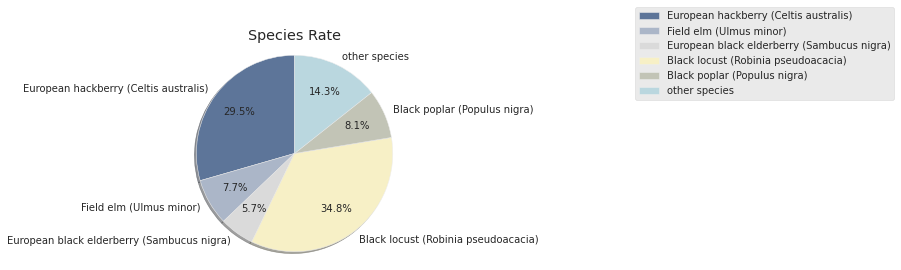

In [43]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from  matplotlib import cm

# Set the color according to the size of the ratio, so that the larger part of the ratio is better read
colors = ['#5d7599','#abb6c8','#dadada','#f7f0c6','#c2c4b6','#bad7df']

# Set label and value
labels=tree_name[:]
labels.append('other species')

# Supplementary values, the proportion of remaining tree species
sizes = rate
sum_other_trees = 1- sum(rate)
sizes = rate[:]
sizes.append(sum_other_trees)

# pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, 
        labeldistance=1.1,pctdistance=0.7, shadow=True, startangle=90)
ax1.axis('equal') 

# Because the pie chart and legend overlap by default, I need to adjust the position of the legend
ax1.axis('off')
ax1.legend(labels, bbox_to_anchor = (1.5,1.2))

# Set the title, adjust the position of the title, and finally output
ax1.set_title('Species Rate', loc='center')
plt.show()


# Chart 2

Next, the data visualization is to represent the number of the main 5 tree species using horizontal bar chart.

From this chart, you can clearly see the approximate number of trees of each of the five species, and also the difference in the number of trees.

In [44]:
# Create an empty list and store the values corresponding to the 5 tree species.
amount = [] 
for i in tree_name:
    b = Species[i]
    amount.append(b)
print(amount)

[150, 39, 29, 177, 41]


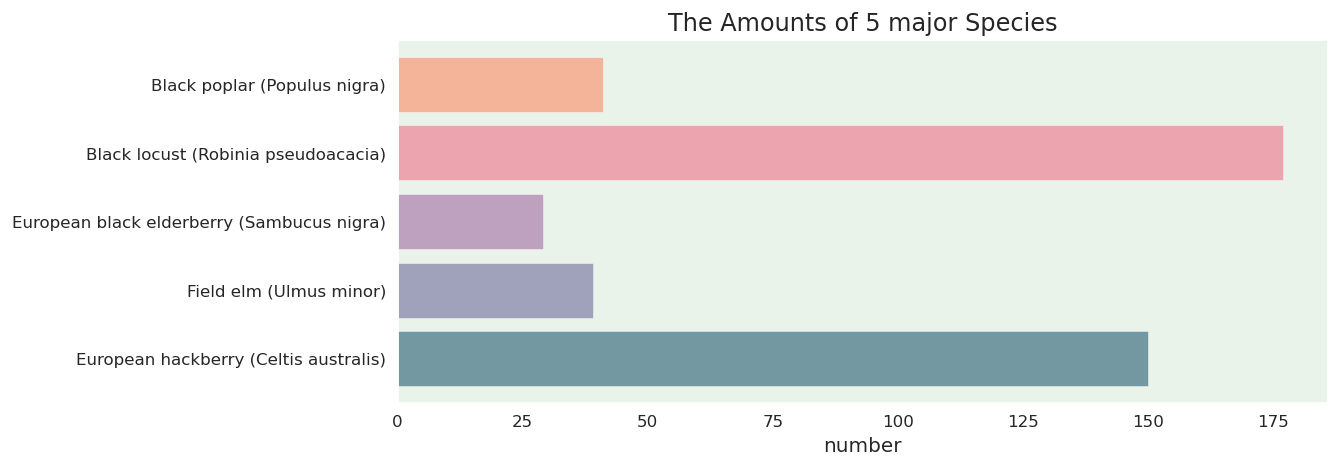

In [45]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Adjust the width, height and dpi of the chart
plt.figure(figsize=(10,4),dpi=120)

# Adjust the chart background color
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"}) 

# Adjust the display color of the bar chart
colors = ['#003f5c', '#58508d', '#955196', '#ef5675', '#ff764a', 'grey']

# Set labels
labels = tree_name

# Because the length of the label is very long, 
# create a horizontal bar chart that is more suitable for presenting the data.
y_pos = np.arange(len(labels))

# Each of the 5 types of trees corresponds to a tree
amount = [150, 39, 29, 177, 41]

# Set the names of the y and x axes, and the title of the chart
plt.barh(y_pos, amount,align='center', alpha=0.5,color=colors)
plt.yticks(y_pos, labels=tree_name)
plt.xlabel('number')
plt.title('The Amounts of 5 major Species')

plt.show()

The following is to explore the relationship between plot and tree species, filtering out the first 5 major species of trees

In [46]:
# Filter the 5 main tree species and assign the corresponding data to b
b = data[data['Species'].isin(tree_name)]
print(b)

     Plot  ID Survey Date                                     Species  \
0       1   1   6/21/2021       European hackberry (Celtis australis)   
1       1   2   6/21/2021       European hackberry (Celtis australis)   
2       1   3   6/21/2021       European hackberry (Celtis australis)   
5       1   6   6/21/2021                     Field elm (Ulmus minor)   
6       1   7   6/21/2021  European black elderberry (Sambucus nigra)   
..    ...  ..         ...                                         ...   
503    25  11   6/23/2021         Black locust (Robinia pseudoacacia)   
504    25  12   6/23/2021         Black locust (Robinia pseudoacacia)   
506    25  14   6/23/2021         Black locust (Robinia pseudoacacia)   
507    25  15   6/23/2021         Black locust (Robinia pseudoacacia)   
508    25  16   6/23/2021         Black locust (Robinia pseudoacacia)   

    Land Use  DBH 1 (cm)  DBH 1: Height (m)  DBH 1: Measured?  DBH 2 (cm)  \
0     Forest        66.8                NaN   

In [47]:
# For plot screening, what are the plots?
Plot_amount = data['Plot']

Plot = {}
for i in Plot_amount:
    if i in Plot.keys():
        Plot[i] += 1
    else:
        Plot[i] = 1
print(Plot.keys())

dict_keys([1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])


In [48]:
# The number of trees corresponding to each Plot?
print(Plot)

{1: 10, 2: 26, 4: 36, 5: 8, 6: 14, 7: 42, 8: 17, 9: 32, 10: 13, 11: 23, 12: 3, 13: 4, 14: 31, 15: 16, 16: 19, 17: 21, 18: 38, 19: 34, 20: 11, 21: 20, 22: 25, 23: 13, 24: 37, 25: 16}


In [66]:
# Filter out plots with the number of trees greater than or equal to 30.
major_Plot = []
d = list(major_Plot)
for i in Plot:
    if Plot[i] >= 30:
        major_Plot.append(i)
print(major_Plot)

[4, 7, 9, 14, 18, 19, 24]


The above operation has filtered out the main 7 plots with more than 30 trees, 

In [50]:
#now create an empty list to store the corresponding number of trees
Plot_tree_number = [] 
for i in major_Plot:
    b = Plot[i]
    Plot_tree_number.append(b)
print(Plot_tree_number)

[36, 42, 32, 31, 38, 34, 37]


In [51]:
#将7个plot筛选出来，7个major plot对应的数据赋给c，为了下面使用
c = data[data['Plot'].isin(major_Plot)]
print(c)

     Plot  ID Survey Date                                     Species  \
36      4   1   6/21/2021       European hackberry (Celtis australis)   
37      4   2   6/21/2021       European hackberry (Celtis australis)   
38      4   3   6/21/2021         Black locust (Robinia pseudoacacia)   
39      4   4   6/21/2021         Black locust (Robinia pseudoacacia)   
40      4   5   6/21/2021         Black locust (Robinia pseudoacacia)   
..    ...  ..         ...                                         ...   
488    24  35   6/21/2021       European hackberry (Celtis australis)   
489    24  36   6/21/2021       European hackberry (Celtis australis)   
490    24  37   6/21/2021         Black locust (Robinia pseudoacacia)   
491    24  38   6/21/2021       European hackberry (Celtis australis)   
492    24  39   6/21/2021  European black elderberry (Sambucus nigra)   

    Land Use  DBH 1 (cm)  DBH 1: Height (m)  DBH 1: Measured?  DBH 2 (cm)  \
36    Forest         7.3                NaN   

# Chart 3

7 plots correspond to the number of trees

and how many trees were planted in each of the 7 plots.

According to the chart, I found that Plot 7 has the maximum numbers of trees.

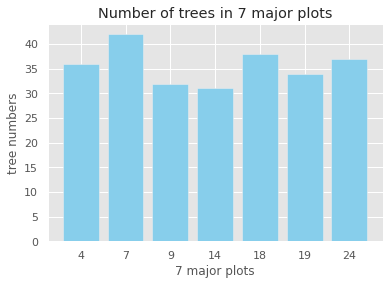

In [72]:
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(x)]
x = major_Plot
number = Plot_tree_number

plt.bar(x_pos, number, color='skyblue')
plt.xlabel("7 major plots")
plt.ylabel("tree numbers")
plt.title("Number of trees in 7 major plots")

plt.xticks(x_pos, x)

plt.show()

# Chart 4

The relationship between the extracted 7 major plots and the DBH of trees.

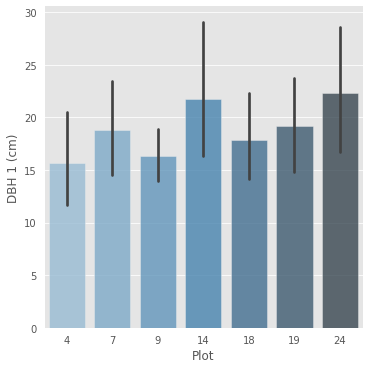

In [53]:
sns.catplot(x='Plot',y='DBH 1 (cm)', data=c, kind = 'bar', palette="Blues_d",alpha=0.8)
plt.show()

# Chart 5

The relationship between the extracted 7 major plots and the Total Height (m) of the tree.

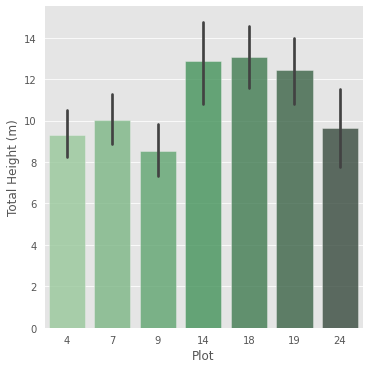

In [54]:
sns.catplot(x='Plot',y='Total Height (m)', data=c, kind = 'bar', palette="Greens_d", alpha=0.8)
plt.show()

# Chart 6

Indicate the relationship of DBH of all plots and trees.

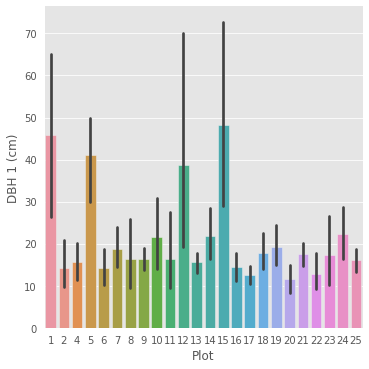

In [55]:
sns.catplot(x='Plot',y='DBH 1 (cm)', data=data, kind = 'bar')
plt.show()

# Chart 7

What are the trees in each of the plots 1-25 and What kind of trees are they?

For example, there are 4 different tree species in plot1, and the largest number of European hackberry is 6

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


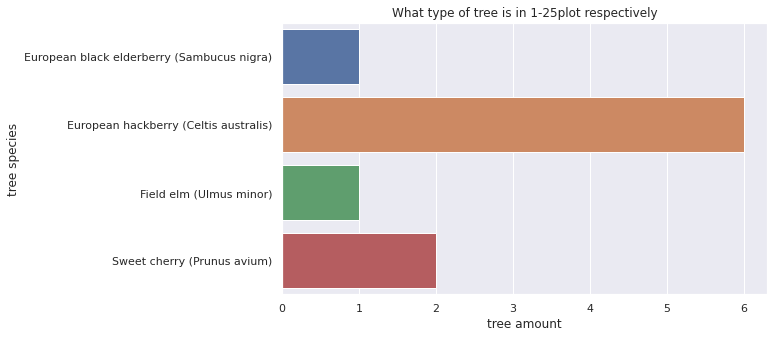

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


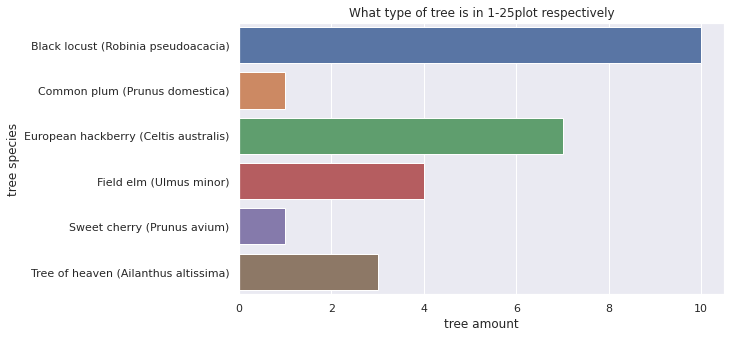

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


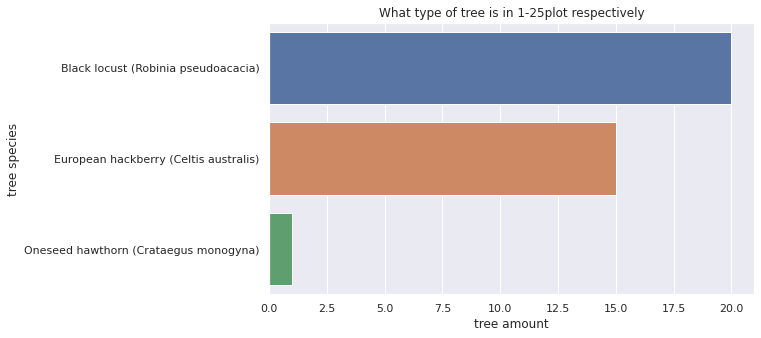

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


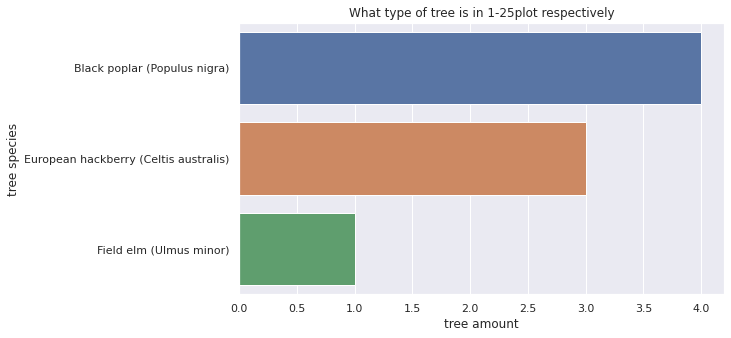

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


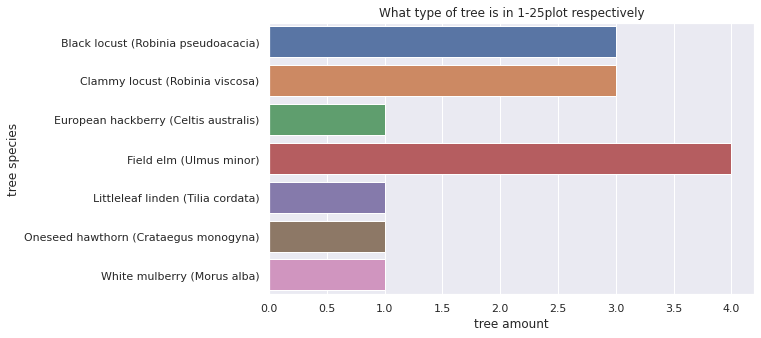

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


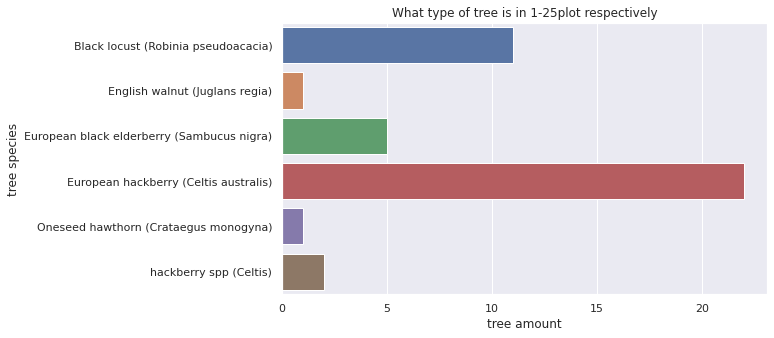

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


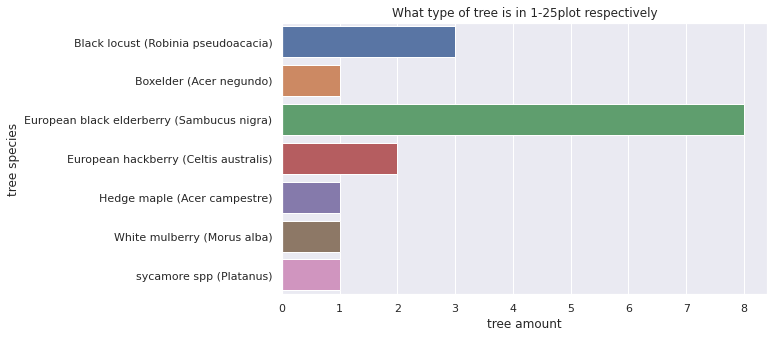

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


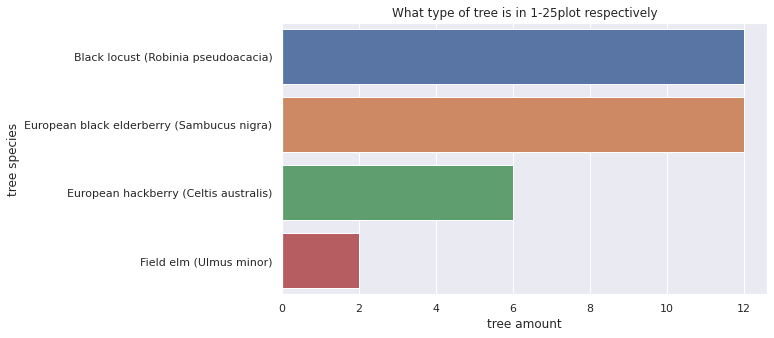

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


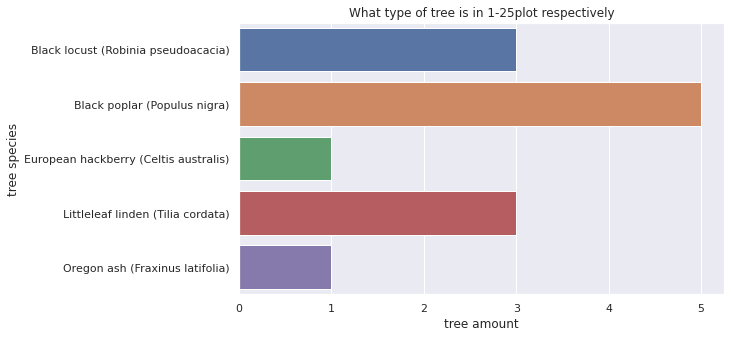

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


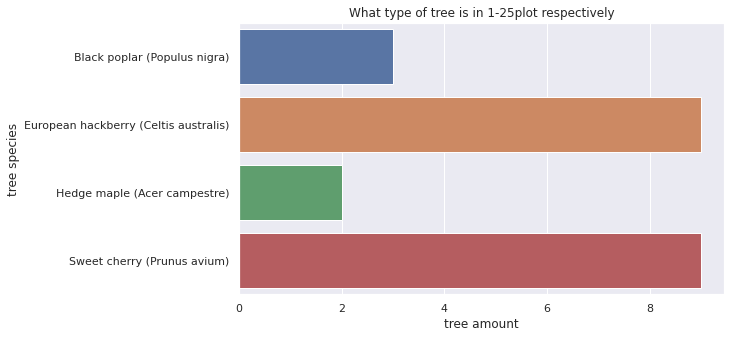

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


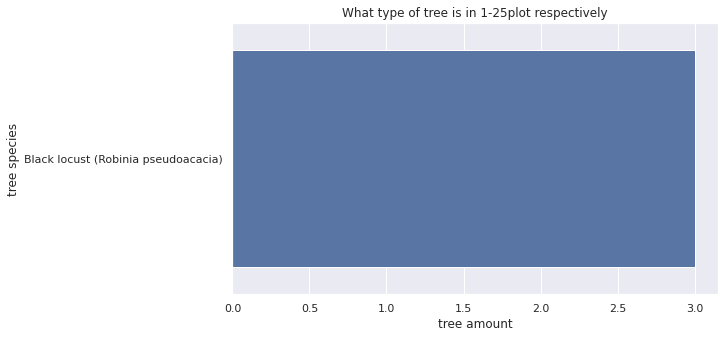

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


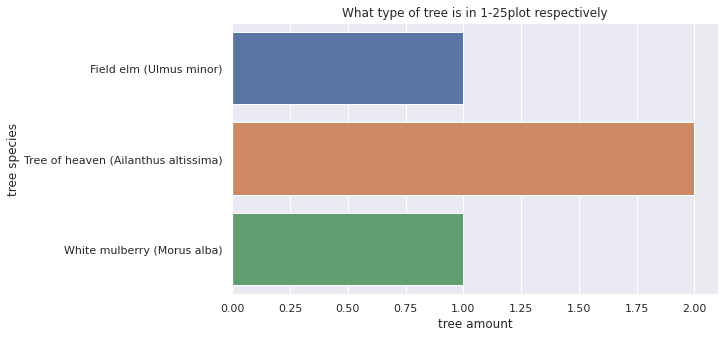

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


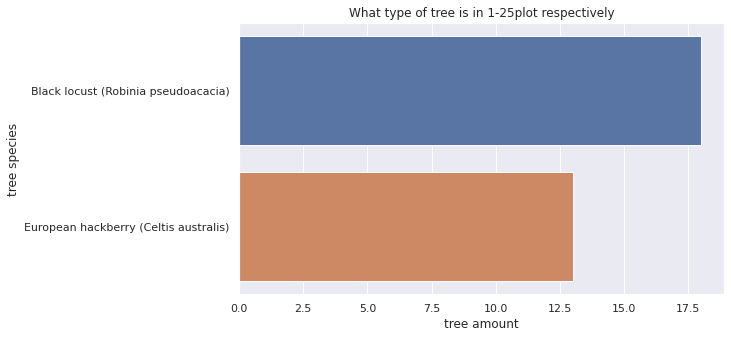

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


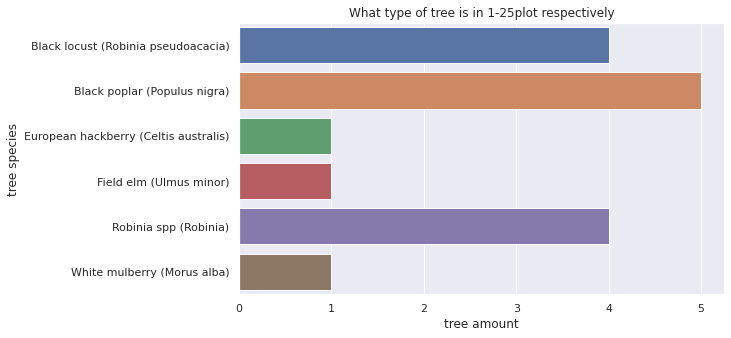

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


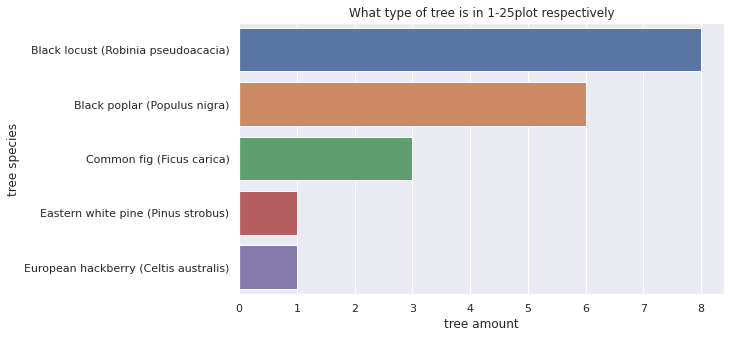

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


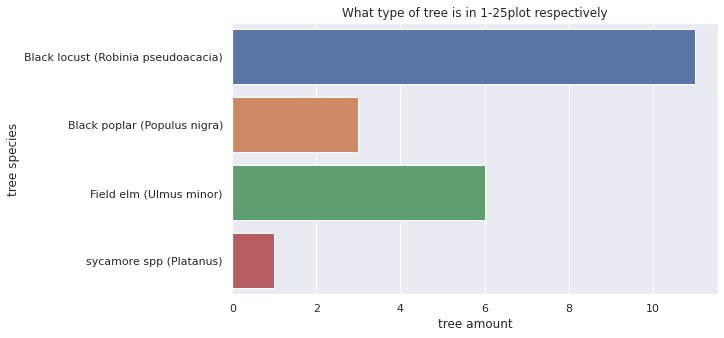

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


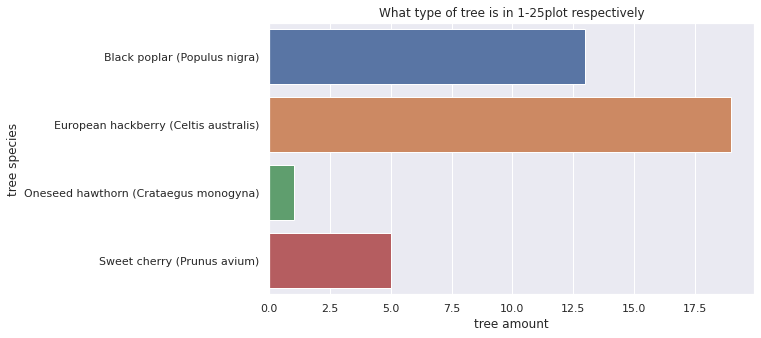

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


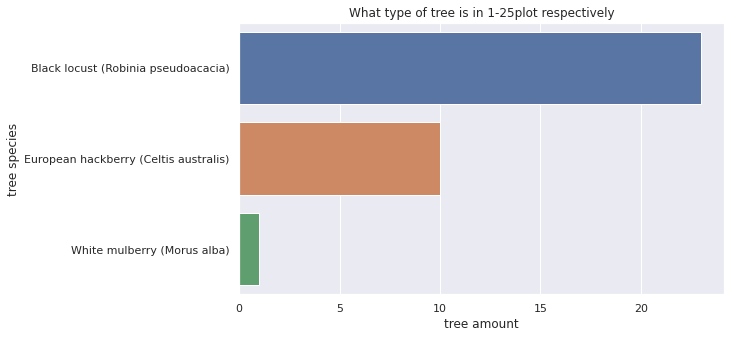

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


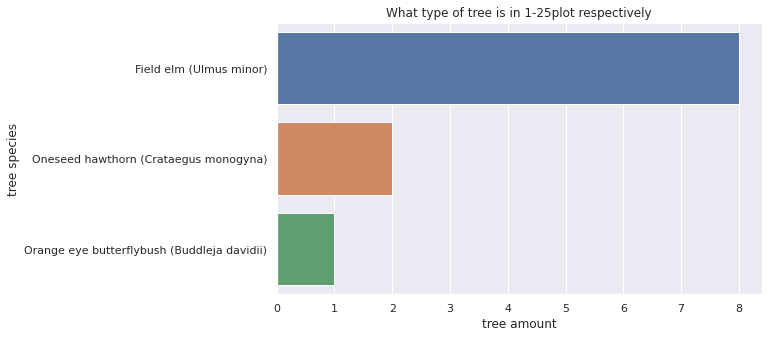

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


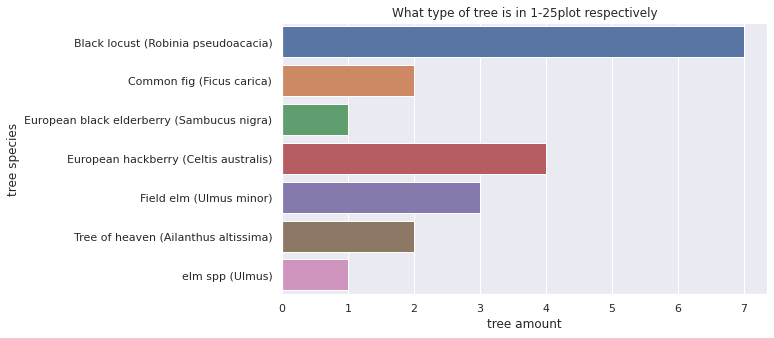

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


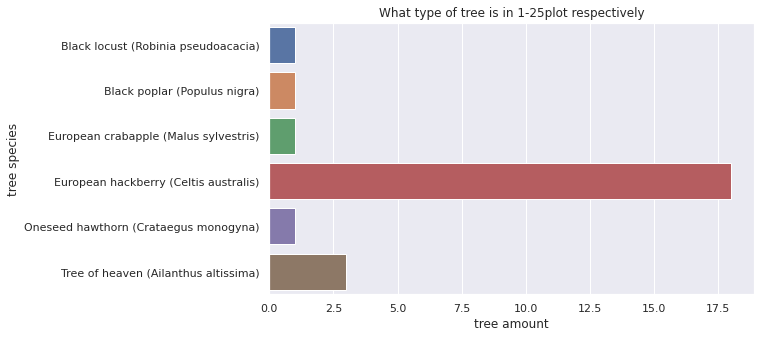

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


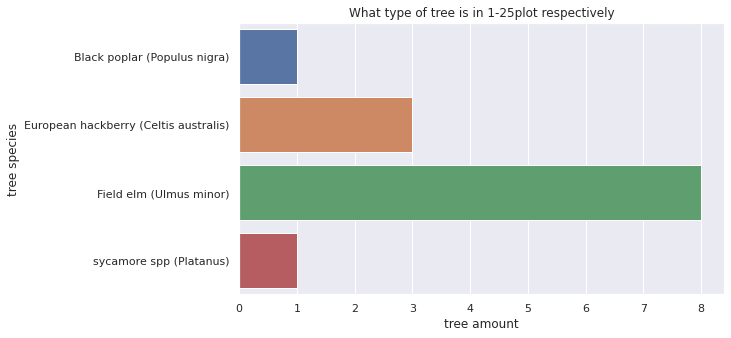

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


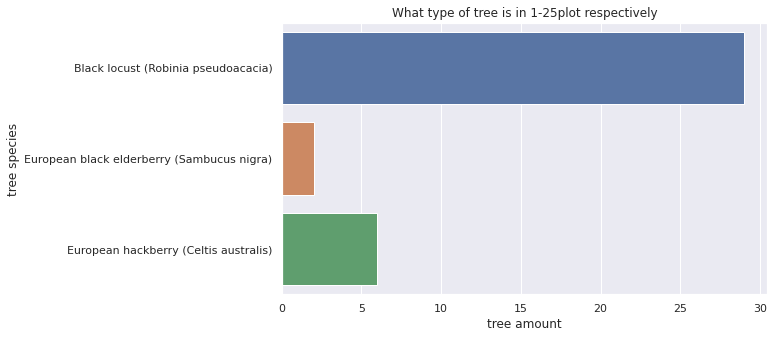

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


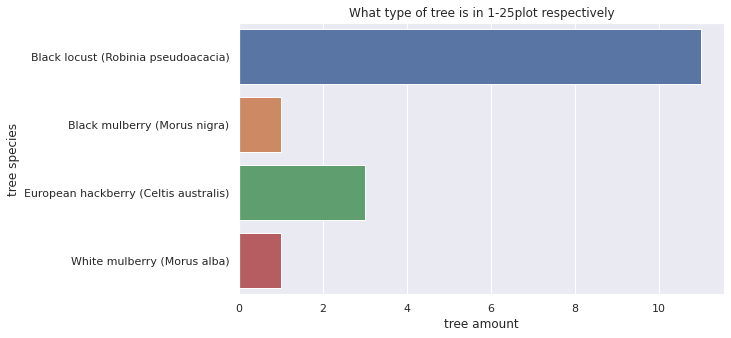

In [64]:
# What kind of trees are in 1-25 plots?
import matplotlib.pyplot as plt
for s in range(25):
    if s == 2:
        continue
    import pandas as pd
    data = pd.read_csv("Copy of 21-06-27_LG-dati-alberi.csv")
    data = data[data['Plot'].isin([s+1])]
    
    tree_species = {}
    for i in data.loc[:,'Species']:
        if i not in tree_species:
            tree_species[i] = 1
        else:
            tree_species[i] = tree_species[i]+1
    tree_type = sorted(tree_species.keys())
    tree_number = []
    for i in tree_type:
        tree_number.append(tree_species[i])
    sns.set()
    
    # Set the canvas size
    fig = plt.figure(figsize=(280,5)) 
    ax = fig.add_subplot(1, 25, s + 1)
    sns.barplot(tree_number,tree_type)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    
    # Set labels for x,y, chart title
    plt.xlabel("tree amount")
    plt.ylabel("tree species")
    plt.title("What type of tree is in 1-25plot respectively")
    plt.show()



# Finding：combining chart 3 & chart 7 
I guessed: 
plot 7 has the most total number of trees, is it possible that it also has the most diversity of trees?

But after comparing the analysis of the 2 charts, this is actually not the case.

For example, plot7 has 42 trees with 6 tree species. 

However, plot6 only has 14 trees in total, but there are 7 tree species.

Therefore，the number of trees in plot is not directly related to the diversity of trees. 
It is not true that the number of trees is higher and the diversity of trees is higher.



# Chart 8

1. The order of tree species is sorted alphabetically 
2. You can see in which plots each tree species is distributed.
3. The first figure shows that the first tree, Black locust (Robinia pseudoacacia), is distributed in the following 17  plots.
4. The second figure shows that the second tree， Black mulberry (Morus nigra), is only present in plot 25.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


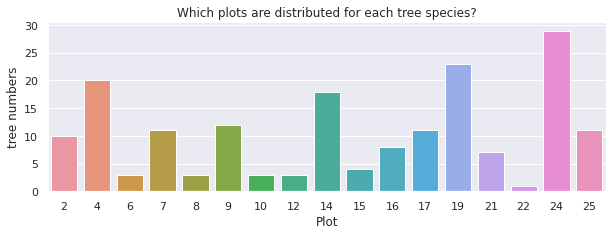

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


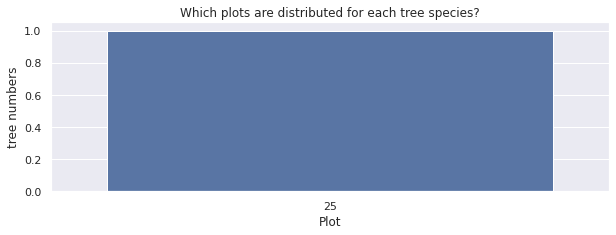

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


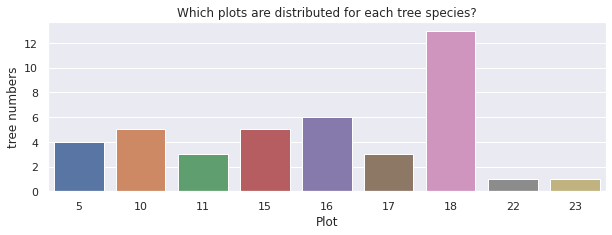

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


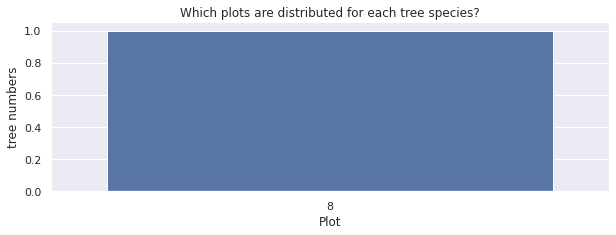

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


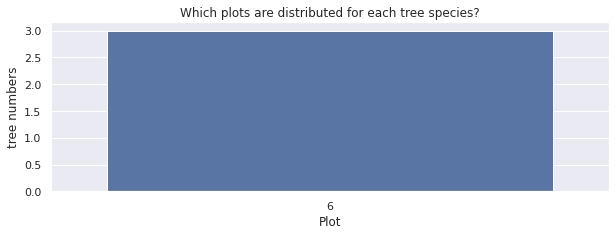

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


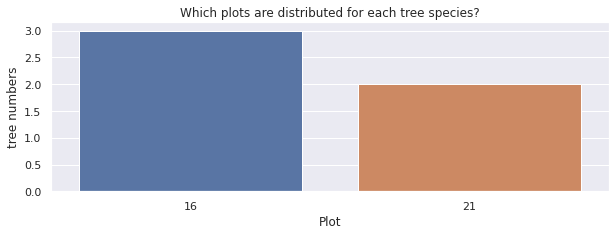

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


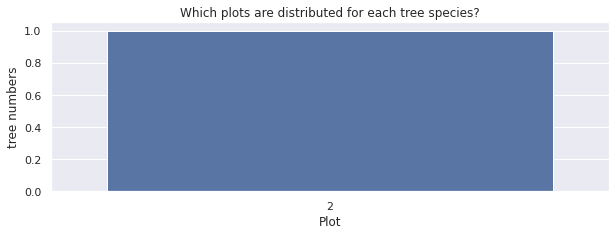

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


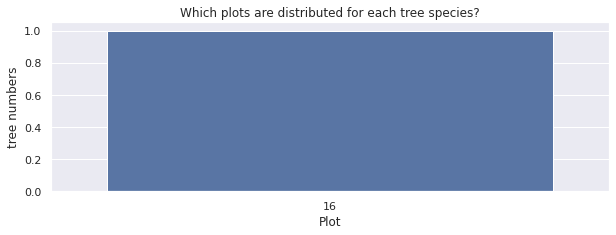

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


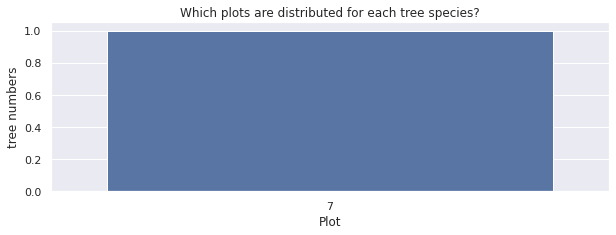

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


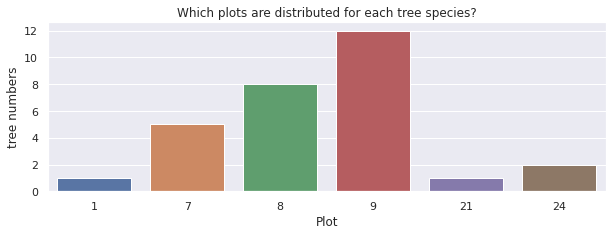

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


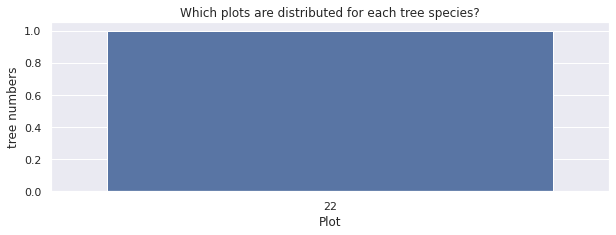

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


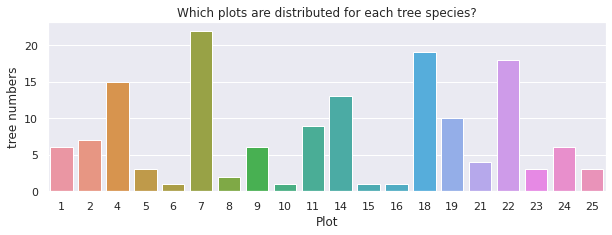

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


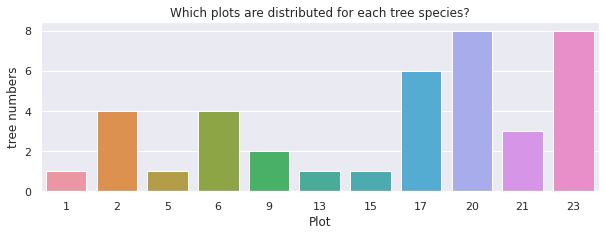

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


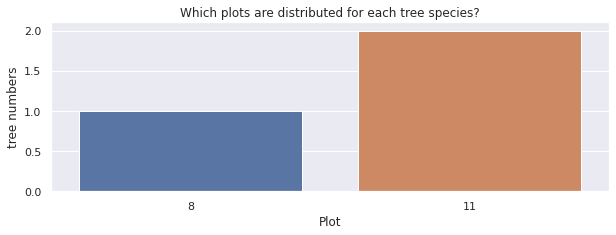

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


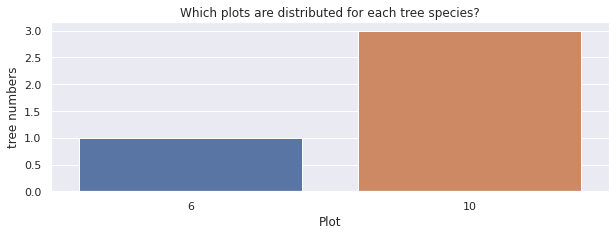

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


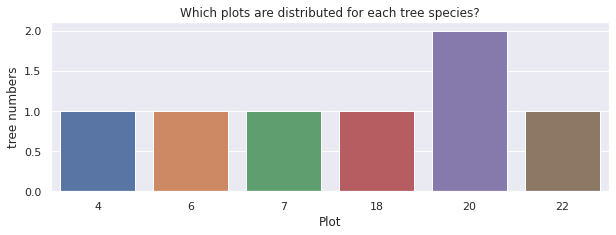

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


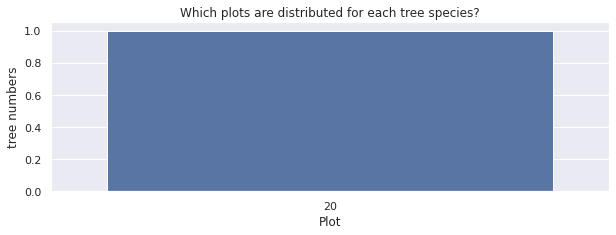

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


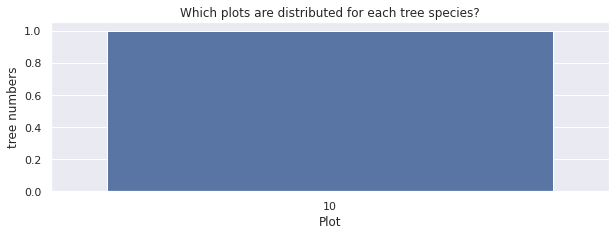

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


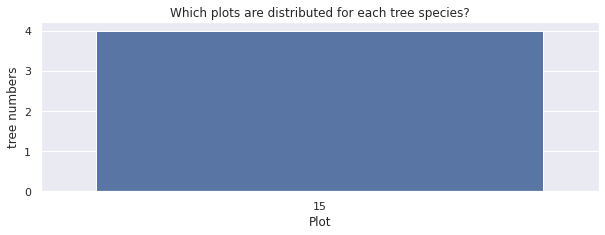

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


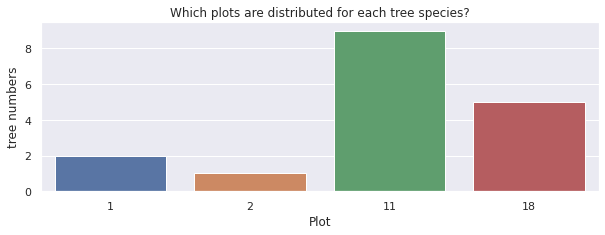

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


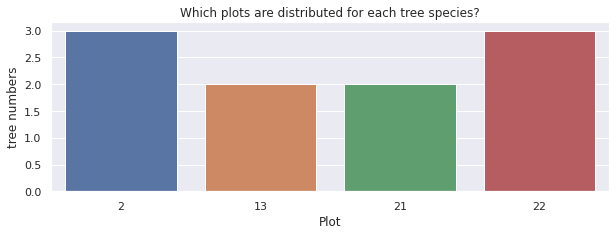

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


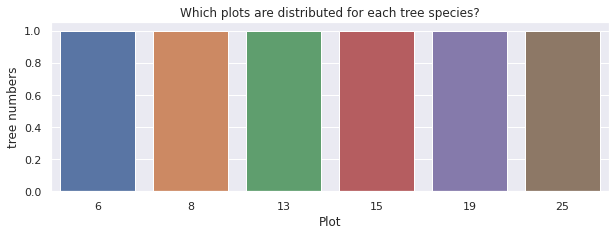

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


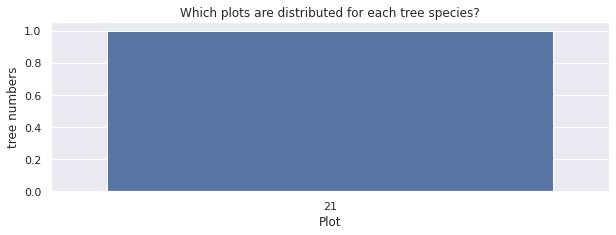

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


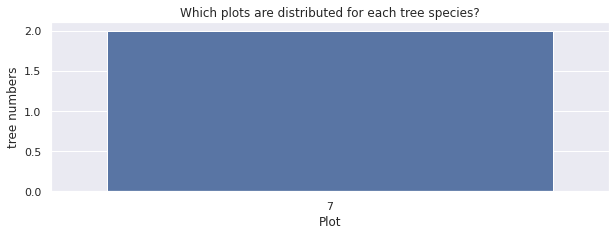

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


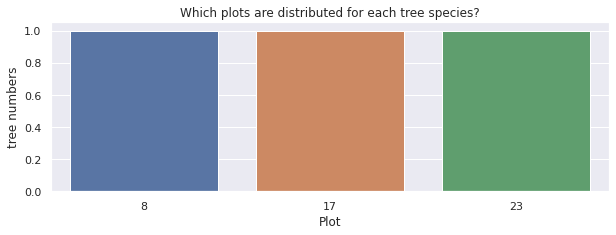

['Black locust (Robinia pseudoacacia)', 'Black mulberry (Morus nigra)', 'Black poplar (Populus nigra)', 'Boxelder (Acer negundo)', 'Clammy locust (Robinia viscosa)', 'Common fig (Ficus carica)', 'Common plum (Prunus domestica)', 'Eastern white pine (Pinus strobus)', 'English walnut (Juglans regia)', 'European black elderberry (Sambucus nigra)', 'European crabapple (Malus sylvestris)', 'European hackberry (Celtis australis)', 'Field elm (Ulmus minor)', 'Hedge maple (Acer campestre)', 'Littleleaf linden (Tilia cordata)', 'Oneseed hawthorn (Crataegus monogyna)', 'Orange eye butterflybush (Buddleja davidii)', 'Oregon ash (Fraxinus latifolia)', 'Robinia spp (Robinia)', 'Sweet cherry (Prunus avium)', 'Tree of heaven (Ailanthus altissima)', 'White mulberry (Morus alba)', 'elm spp (Ulmus)', 'hackberry spp (Celtis)', 'sycamore spp (Platanus)']


In [62]:
# How are each tree species distributed in the plot separately?
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

for s in range(len(tree_name)):
    import pandas as pd
    data = pd.read_csv("Copy of 21-06-27_LG-dati-alberi.csv")
    tree_name = [i for i in data['Species']]
    tree_name = list(set(tree_name))
    tree_name = sorted(tree_name) 
    # print(tree_name) # The name of each tree stored in order alphabetically
    

    data = data[data['Species'].isin([tree_name[s]])]
    #print(data)
    hashmap = {}
    for i in data.loc[:,'Plot']:
        if i not in hashmap:
            hashmap[i] = 1
        else:
            hashmap[i] = hashmap[i]+1
    plot_type = sorted(hashmap.keys())
    #print(plot_type)


    number_of_tree_in_plot = []
    for i in plot_type:
        number_of_tree_in_plot.append(hashmap[i])
    #print(number_of_tree_in_plot)
    sns.set()
    
    # first set the canvas size 
    fig = plt.figure(figsize=(10,100)) 
    
    # Traverse each subgraph
    ax = fig.add_subplot(25, 1, s + 1)
    sns.barplot(plot_type,number_of_tree_in_plot)
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    
    # Set labels for x,y, chart title
    plt.xlabel("Plot")
    plt.ylabel("tree numbers")
    plt.title("Which plots are distributed for each tree species?")
    plt.show()
    print(tree_name)

# Reflect and Hypothesise: 
What do you think might be behind the relationships and distributions that you have found? 

How does your data relate to the world?

In short, what hypotheses came up as you explored the data, and how would you go about testing them? We would expect to see: 

1.A 200 word reflection on the data 

2.3-5 hypotheses with an explanation of: 

  -What your hypothesis is 
  
  -why you think that (referring to your graphs)  
  
  -How you could go about testing it  
  
(note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..) 

NOTE: You don’t have to actually test the hypotheses, you just have to demonstrate that you have plausibly thought about how you would test them. 

In [68]:
# Another table shows the comparison of the number of trees and trees coverage 
# between the 25 out of 25 plots and 9 out of 25 plots in Hyde park
import pandas as pd
data2 = pd.read_csv("Copy of La Goccia key findings.csv")

# Reflect & Hypothesise: 
  I think the link between data should be strengthened, such as the height of plot and species, the height of different plot trees, the growth of different tree species in different plots, the number of trees and the diversity of trees can be further explored and thought about, and reflected by data analysis and visualization. The tree data can be associated with environmental protection, but still lack the connection within the data and the scientific way of calculation. The following are my hypotheses and reflections on the test methods:

1. Would a plot with more trees have more species of trees? It can be seen from charts 3 and 7 that there is no pattern in the both of diversity and number.

2. It can be seen that the number of 2 species of trees is much higher than other trees, is the reason related to environmental factors, such as Carbon Storage, Oxygen Production related links.

3. The number of trees in the plot above also shows that some areas have more trees planted and some areas have less. Does it have to do with the fact that the height of the trees growing in each tree will affect each other if they are arranged to be planted in different areas? It is possible to check whether there is a pattern by examining the comparison of the height of the trees in each area.
   
4. The total height of the trees differs between the different plots, will some trees grow too tall to affect the rise of other trees? It can be started by screening the height of the tree and comparing the height comparisons of other trees planted centrally with this tree within the plot.

5. Another table shows the comparison of the number of trees and trees coverage between the 25 out of 25 plots and 9 out of 25 plots in Hyde park.It can be found that the number of trees in 9 of 25 plot is not much different from 25 of 25 plot, which may indicate that the trees in this 9 plot are planted more intensively. But it is not known which specific plots are sampled for comparison. And there is a lack of data associated with the environment, such as Carbon Storage, Oxygen Production, etc. The need to move down to a deeper level of meaning requires the next step of communication with the data holder, filling in data material or consulting information.